In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
df = pd.read_csv('http://www.citd.moeaidb.gov.tw/CITDweb/Web/Download/InnovationCompanies.csv')
df.head(20)

,年度,名次,公司名稱
0,2015,1,台灣積體電路製造股份有限公司
1,2015,2,華碩電腦股份有限公司
2,2015,3,鴻海精密工業股份有限公司
3,2015,4,大立光電股份有限公司
4,2015,5,統一超商股份有限公司
5,2015,6,聯發科技股份有限公司
6,2015,7,全家便利商店股份有限公司
7,2015,8,研華股份有限公司
8,2015,9,巨大機械工業股份有限公司
9,2015,10,宏達國際電子股份有限公司


<BarContainer object of 20 artists>

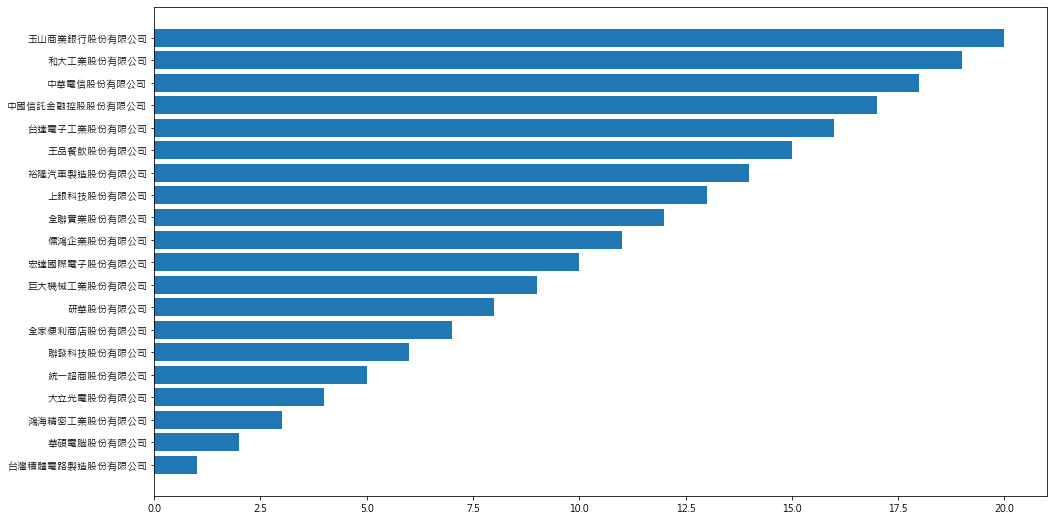

In [129]:
df['年度'] = df.astype(str)
basic = df[df['年度']=='2015'].sort_values('名次').head(20)
fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(basic['公司名稱'], basic['名次'])

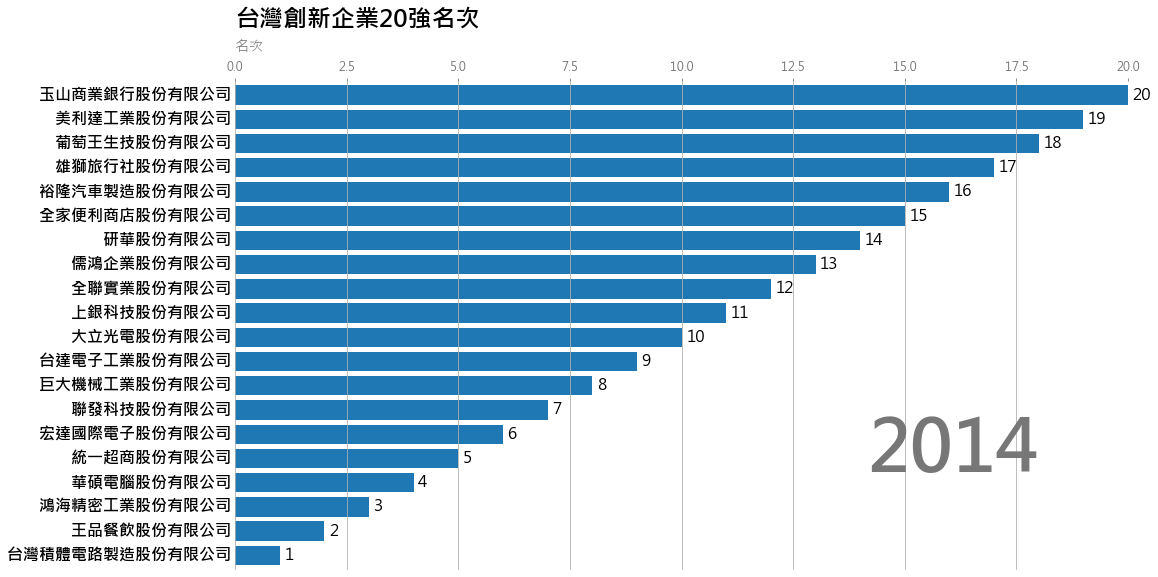

In [131]:
fig, ax = plt.subplots(figsize=(16, 9)) # 在同一個視窗繪製多個圖表

def race_barchart(input_year):
    dff = df[df['年度'].eq(input_year)].sort_values(by='名次', ascending=True).tail(20)
    ax.clear() 
    ax.set_yticks([]) 
    ax.barh(dff['公司名稱'], dff['名次'],height=0.8)
    dx = dff['名次'].max()/200 #加上除以200
    
    for i, (value, name) in enumerate(zip(dff['名次'], dff['公司名稱'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center') 
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center')
        
    #右邊大文字標示(年月)        
    ax.text(0.9, 0.2, input_year[:7].replace('-','/'), 
            transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000)
    
    #左上方小文字標示-旅遊人數 (thousands)
    ax.text(0, 1.06, '名次', transform=ax.transAxes, size=14, color='#777777')
    

    
    #x軸座標改灰色
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    
    #x軸座標改至上方
    ax.xaxis.set_ticks_position('top') 
    ax.set_yticks([]) #清除y轴原本刻度
    ax.margins(0, 0.01) #x轴刻度靠近第一個 bar
    ax.grid(which='major', axis='x', linestyle='-') #格線樣式
    
    #左上方大文字標示-台灣赴各國觀光人數
    ax.text(0, 1.15, '台灣創新企業20強名次',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')

    plt.box(False) #只刪除邊框, 不刪除刻度標籤
    
race_barchart('2014')

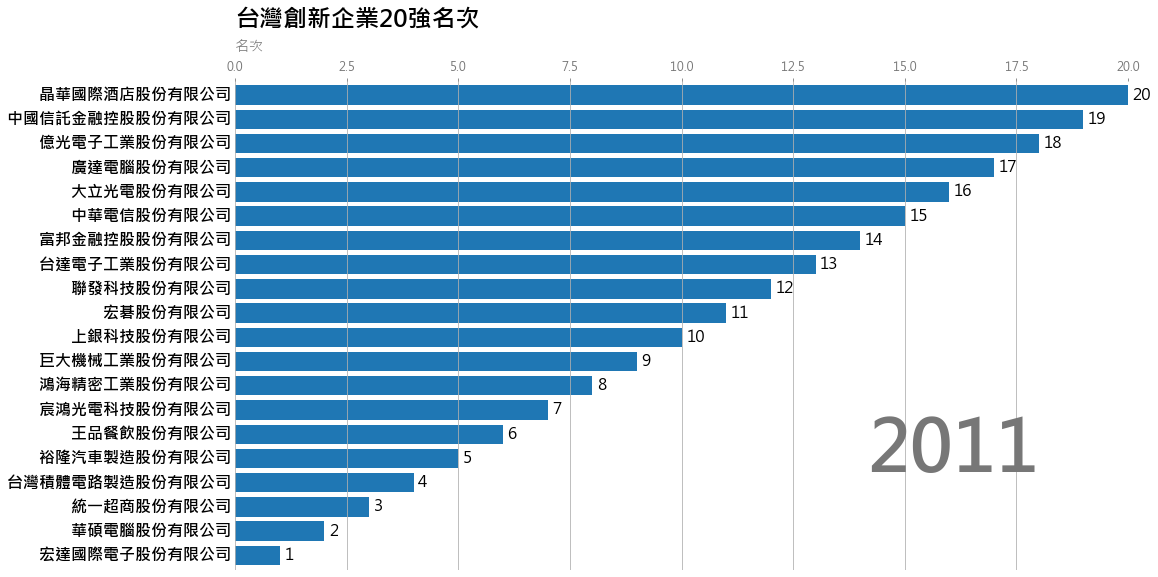

In [132]:
from matplotlib.animation import FuncAnimation
year = list(set(df.年度.values))
year.sort()

fig, ax = plt.subplots(figsize=(16, 9))
animator = animation.FuncAnimation(fig, race_barchart, frames=year)
HTML(animator.to_jshtml())

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


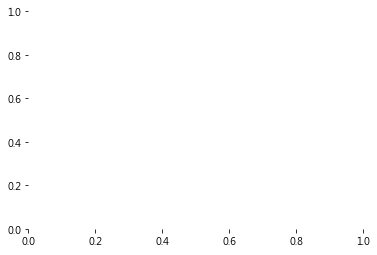

In [133]:
animator.save("台灣創新企業20強名次.gif",writer='imagemagick', fps=3)

In [118]:
animation.PillowWriter("C:\\Users\\wctta\\台灣創新企業20強名次.gif")